# **프로젝트 결과**

### **첫 번째 테스트 과정 요약 (28x28 이미지 해상도, 기본 모델)**

- 목표: 초기 모델의 성능 확인.
- 모델 구성:
input_shape=(28,28,3)
Conv2D(32, (3,3)) -> MaxPooling2D -> Conv2D(64, (3,3)) -> MaxPooling2D
Flatten -> Dense(64) -> Dense(3) (softmax)
- 특징: Dropout 레이어 없음, BatchNormalization 레이어 없음.
- 훈련 데이터: 28x28로 리사이징된 303개 이미지 (rock_paper_scissors 디렉토리).
- 테스트 데이터: data.zip 압축 해제 후 28x28로 리사이징된 300개 이미지 (rock_paper_scissors_test_new 디렉토리).
- 테스트 정확도: 0.3900 (39.00%)
- 결론: 초기 모델은 테스트 데이터에서 매우 낮은 정확도를 보였습니다. 이는 무작위 추측(약 33.3%) 수준에 가까웠으며, 모델의 일반화 성능이 매우 좋지 않음을 시사했습니다.

* * *

### **두 번째 테스트 과정 요약 (64x64 이미지 해상도, Dropout 및 Batch Normalization 추가)**
- 목표: 이미지 해상도 증가 및 오버피팅 방지 기법(Dropout, Batch Normalization) 적용 후 성능 개선 확인.
- 모델 구성:
input_shape=(64,64,3)
Conv2D(32, (3,3)) -> MaxPooling2D -> Conv2D(64, (3,3)) -> MaxPooling2D
Flatten -> Dropout(0.25) -> Dense(64) -> Dense(3) (softmax)
- 특징: Dropout 레이어 추가.
이후 BatchNormalization 레이어를 Conv2D와 Activation 사이에 추가 (cf026017 셀).
- 훈련 데이터: 64x64로 리사이징된 303개 이미지 (rock_paper_scissors 디렉토리).
- 테스트 데이터: data.zip 압축 해제 후 64x64로 리사이징된 300개 이미지 (rock_paper_scissors_test_new 디렉토리).
- 테스트 정확도: 0.4600 (46.00%)
- 결론: 이미지 해상도 증가와 Dropout, BatchNormalization 적용으로 정확도가 39.00%에서 46.00%로 소폭 상승했습니다. 하지만 여전히 성능이 만족스럽지 않았고, 특히 훈련 정확도는 높았으나 검증 정확도가 낮아 오버피팅 문제가 남아있음을 시사했습니다.

* * *

### **세 번째 테스트 과정 요약 (128x128 이미지 해상도, 데이터 증강, GlobalAveragePooling2D, Dropout 0.5)**
- 목표: 이미지 해상도 추가 증가, 데이터 증강, GlobalAveragePooling2D 적용 등 추가적인 성능 개선 시도 및 완전히 새로운 테스트 데이터셋으로 평가.
- 모델 구성:
input_shape=(128,128,3)
Conv2D(64, (3,3)) -> BatchNormalization -> Activation('relu') -> MaxPooling2D
Conv2D(128, (3,3)) -> BatchNormalization -> Activation('relu') -> MaxPooling2D
GlobalAveragePooling2D() (Flatten 대신) -> Dropout(0.5) -> Dense(128) -> Dense(3) (softmax)
- 특징: GlobalAveragePooling2D로 파라미터 수 감소 및 공간 정보 유지, Dropout 비율 0.5로 상향, BatchNormalization 유지.
- 훈련 데이터: 128x128로 리사이징된 303개 이미지 (rock_paper_scissors 디렉토리)에 ImageDataGenerator를 이용한 데이터 증강 적용.
테스트 데이터: scissor2.zip, rock2.zip, paper2.zip에서 새로 압축 해제 후 128x128로 리사이징된 330개 이미지 (rock_paper_scissors_test_new_2 디렉토리).
- 테스트 정확도: 0.3333 (33.33%)
- 결론: 다양한 성능 향상 기법(고해상도 이미지, 데이터 증강, GlobalAveragePooling2D, Dropout, BatchNormalization)을 적용했지만, 새로운 테스트 데이터셋에 대한 정확도는 33.33%로 오히려 가장 낮은 결과를 보였습니다. 이는 모델이 훈련 데이터에 심하게 과적합되었거나, 새로운 테스트 데이터셋의 분포가 훈련 데이터와 크게 다르다는 것을 강력하게 시사합니다. 모델이 새로운 데이터에 대한 일반화 능력이 부족함을 나타냅니다.


In [1]:
import tensorflow as tf
import numpy as np

print(tf.__version__)
print(np.__version__)

2.19.0
2.0.2


In [2]:
from PIL import Image
import glob
import os

print("PIL 라이브러리 import 완료!")

PIL 라이브러리 import 완료!


In [9]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 28x28 사이즈로 바꾸어 저장합니다.
	target_size=(28,28)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.LANCZOS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# Define base_dir, assuming it's meant to be the parent directory for rock_paper_scissors
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
os.makedirs(base_dir, exist_ok=True)

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.path.join(base_dir, "scissor") # Corrected path to the extracted directory
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
가위 이미지 resize 완료!


In [10]:
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
image_dir_path = os.path.join(base_dir, "rock") # Corrected path to the extracted directory

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
바위 이미지 resize 완료!


In [11]:
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
image_dir_path = os.path.join(base_dir, "paper") # Corrected path to the extracted directory

resize_images(image_dir_path)

print("보 이미지 resize 완료!")

101  images to be resized.
101  images resized.
보 이미지 resize 완료!


In [12]:
import numpy as np

def load_data(img_path, number_of_data=300):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=28
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors" # Define base_dir
image_dir_path = base_dir # Use base_dir for loading data
(x_train, y_train)=load_data(image_dir_path, number_of_data=303)   # Updated number_of_data to match actual images (101*3)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 303 입니다.
x_train shape: (303, 28, 28, 3)
y_train shape: (303,)


라벨:  0


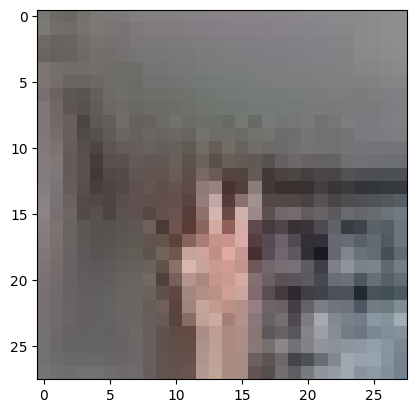

In [13]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [15]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       102,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,051 (476.76 KB)

 Trainable params: 122,051 (476.76 KB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 26ms/step - accuracy: 0.3483 - loss: 1.1049
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.4293 - loss: 1.0654
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.6333 - loss: 0.9740
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - accuracy: 0.9338 - loss: 0.7678
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - accuracy: 0.9157 - loss: 0.5002
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9538 - loss: 0.2901
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9641 - loss: 0.2099
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9666 - loss: 0.1340
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - accuracy: 0.9935 - loss: 0.0853
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.9865 - loss: 0.0638


In [18]:
test_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test"
os.makedirs(test_dir, exist_ok=True)
print(f"Created directory for test images: {test_dir}")

Created directory for test images: /root/aiffel/rock_paper_scissors_test


In [19]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 64x64 사이즈로 바꾸어 저장합니다.
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.LANCZOS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# Define base_dir, assuming it's meant to be the parent directory for rock_paper_scissors
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
os.makedirs(base_dir, exist_ok=True)

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.path.join(base_dir, "scissor") # Corrected path to the extracted directory
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
가위 이미지 resize 완료!


In [20]:
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
image_dir_path = os.path.join(base_dir, "rock") # Corrected path to the extracted directory

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
바위 이미지 resize 완료!


In [21]:
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
image_dir_path = os.path.join(base_dir, "paper") # Corrected path to the extracted directory

resize_images(image_dir_path)

print("보 이미지 resize 완료!")

101  images to be resized.
101  images resized.
보 이미지 resize 완료!


In [24]:
import numpy as np

def load_data(img_path, number_of_data=303):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=64
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors" # Define base_dir
image_dir_path = base_dir # Use base_dir for loading data
(x_train, y_train)=load_data(image_dir_path, number_of_data=303)   # Updated number_of_data to match actual images (101*3)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 303 입니다.
x_train shape: (303, 64, 64, 3)
y_train shape: (303,)


라벨:  0


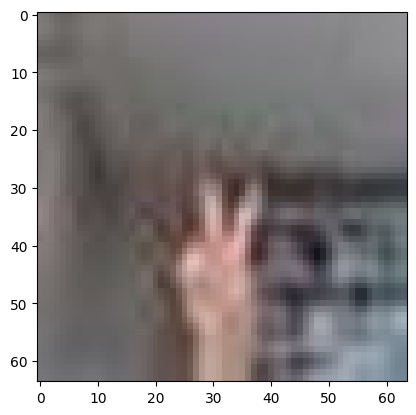

In [25]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0])
print('라벨: ', y_train[0])

In [30]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,467 (3.14 MB)

 Trainable params: 822,467 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [31]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [32]:
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.3316 - loss: 1.1280
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 202ms/step - accuracy: 0.4707 - loss: 1.0752
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.6585 - loss: 0.9947
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 137ms/step - accuracy: 0.8373 - loss: 0.7821
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - accuracy: 0.7292 - loss: 0.6449
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 134ms/step - accuracy: 0.9495 - loss: 0.3434
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9402 - loss: 0.1966
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.9325 - loss: 0.1758
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 138ms/step - accuracy: 0.9533 - loss: 0.1280
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 132ms/step - accuracy: 0.9843 - loss: 0.0768


## 오버피팅 방지 기법 적용

### Subtask:
모델의 `Flatten` 레이어 다음에 `Dropout` 레이어를 추가하여 오버피팅을 방지합니다. 이는 모델의 일반화 성능을 향상시키는 데 도움을 줄 수 있습니다.


In [33]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25), # Added Dropout layer
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 12544)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 64)             │       802,880 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 822,467 (3.14 MB)

 Trainable params: 822,467 (3.14 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [35]:
model.fit(x_train_norm, y_train, epochs=10)

Epoch 1/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 135ms/step - accuracy: 0.3329 - loss: 1.1377
Epoch 2/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 135ms/step - accuracy: 0.5371 - loss: 1.0676
Epoch 3/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 178ms/step - accuracy: 0.6912 - loss: 0.9557
Epoch 4/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 172ms/step - accuracy: 0.8085 - loss: 0.7019
Epoch 5/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 154ms/step - accuracy: 0.8105 - loss: 0.4862
Epoch 6/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.9395 - loss: 0.2804
Epoch 7/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 138ms/step - accuracy: 0.9226 - loss: 0.2420
Epoch 8/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 136ms/step - accuracy: 0.9381 - loss: 0.1804
Epoch 9/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 139ms/step - accuracy: 0.9799 - loss: 0.1135
Epoch 10/10
10/10 ━━━━━━━━━━━━━━━━━━━━ 3s 157ms/step - accuracy: 0.9794 - loss: 0.0778


## 학습 결과 시각화 구현

### Subtask:
모델 학습 시 검증 데이터셋을 추가하고, 학습 과정에서 발생하는 정확도와 손실(훈련 및 검증)을 기록하여 `matplotlib`을 이용해 그래프로 시각화합니다. 이를 통해 모델의 학습 경향과 오버피팅 여부를 시각적으로 확인할 수 있습니다.


In [36]:
from sklearn.model_selection import train_test_split

print("Imported train_test_split")

Imported train_test_split


In [37]:
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_norm, y_train, test_size=0.2, random_state=42)

print("Data split into training and validation sets.")
print(f"x_train_split shape: {x_train_split.shape}")
print(f"y_train_split shape: {y_train_split.shape}")
print(f"x_val_split shape: {x_val_split.shape}")
print(f"y_val_split shape: {y_val_split.shape}")

Data split into training and validation sets.
x_train_split shape: (242, 64, 64, 3)
y_train_split shape: (242,)
x_val_split shape: (61, 64, 64, 3)
y_val_split shape: (61,)


In [38]:
history = model.fit(x_train_split, y_train_split, epochs=10, validation_data=(x_val_split, y_val_split))

print("Model re-trained with validation data.")

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 2s 255ms/step - accuracy: 0.9915 - loss: 0.0539 - val_accuracy: 0.9672 - val_loss: 0.0779
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 162ms/step - accuracy: 0.9959 - loss: 0.0598 - val_accuracy: 0.9672 - val_loss: 0.0455
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 163ms/step - accuracy: 1.0000 - loss: 0.0476 - val_accuracy: 1.0000 - val_loss: 0.0245
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 157ms/step - accuracy: 1.0000 - loss: 0.0334 - val_accuracy: 0.9672 - val_loss: 0.0448
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 164ms/step - accuracy: 1.0000 - loss: 0.0258 - val_accuracy: 1.0000 - val_loss: 0.0128
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 429ms/step - accuracy: 0.9973 - loss: 0.0216 - val_accuracy: 0.9672 - val_loss: 0.0408
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 3s 155ms/step - accuracy: 0.9991 - loss: 0.0165 - val_accuracy: 1.0000 - val_loss: 0.0232
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 155ms/step - accuracy: 0.9980 - loss: 0.0177 - val_accuracy: 1.0000 - val_loss:

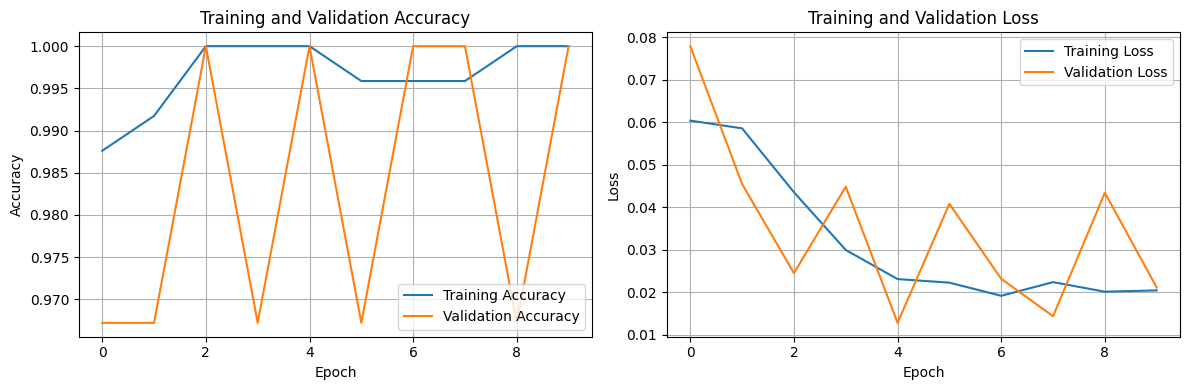

Training history visualized.


In [39]:
import matplotlib.pyplot as plt

# Get training and validation history from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Training history visualized.")

## 테스트 데이터셋 준비

### Subtask:
새로운 테스트 이미지를 저장할 디렉토리를 생성합니다. 이 디렉토리에 테스트용 가위, 바위, 보 이미지들을 적절한 크기(64x64)로 리사이징하여 준비합니다.


## 새로운 테스트 데이터 압축 해제

### Subtask:
data.zip 파일을 압축 해제하여 테스트 이미지를 위한 새로운 디렉토리(예: /root/aiffel/rock_paper_scissors_test_new)에 저장합니다. 이전에 test_dir로 사용했던 경로와 겹치지 않도록 새로운 경로를 설정합니다.


In [42]:
import zipfile
import os

# 2. 테스트 이미지를 저장할 새로운 디렉토리 경로를 '/root/aiffel/rock_paper_scissors_test_new'로 설정하고 test_dir_new 변수에 할당합니다.
test_dir_new = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new"

# 3. os.makedirs() 함수를 사용하여 test_dir_new 디렉토리를 생성합니다.
os.makedirs(test_dir_new, exist_ok=True)
print(f"Created new directory for test images: {test_dir_new}")

# 4. data.zip 파일의 경로를 zip_file_path 변수에 할당합니다.
zip_file_path = './data.zip'

# 5. zipfile.ZipFile()을 사용하여 data.zip 파일을 읽기 모드로 엽니다.
# 6. extractall() 메서드를 사용하여 압축 파일을 test_dir_new 경로에 압축 해제합니다.
with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
    zip_ref.extractall(test_dir_new)

print("data.zip 파일 압축 해제 완료!")

Created new directory for test images: /root/aiffel/rock_paper_scissors_test_new
data.zip 파일 압축 해제 완료!


In [43]:
import glob
from PIL import Image
import os

def resize_images_test(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(f"{len(images)} images to be resized in {img_path}.")

    # 파일마다 모두 64x64 사이즈로 바꾸어 저장합니다.
	target_size=(64,64)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.LANCZOS)
		new_img.save(img, "JPEG")

	print(f"{len(images)} images resized in {img_path}.")

test_dir_new = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new"

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_scissor_test = os.path.join(test_dir_new, "scissor")
resize_images_test(image_dir_path_scissor_test)
print("테스트 가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_rock_test = os.path.join(test_dir_new, "rock")
resize_images_test(image_dir_path_rock_test)
print("테스트 바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_paper_test = os.path.join(test_dir_new, "paper")
resize_images_test(image_dir_path_paper_test)
print("테스트 보 이미지 resize 완료!")


100 images to be resized in /root/aiffel/rock_paper_scissors_test_new/scissor.
100 images resized in /root/aiffel/rock_paper_scissors_test_new/scissor.
테스트 가위 이미지 resize 완료!
100 images to be resized in /root/aiffel/rock_paper_scissors_test_new/rock.
100 images resized in /root/aiffel/rock_paper_scissors_test_new/rock.
테스트 바위 이미지 resize 완료!
100 images to be resized in /root/aiffel/rock_paper_scissors_test_new/paper.
100 images resized in /root/aiffel/rock_paper_scissors_test_new/paper.
테스트 보 이미지 resize 완료!


In [44]:
import numpy as np

def load_data_test(img_path, number_of_data=300):  # 테스트 이미지 개수 총합에 주의하세요.
    img_size=64
    color=3

    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_dir_new = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new" # Define test_dir_new
image_dir_path_test = test_dir_new # Use test_dir_new for loading data
(x_test, y_test)=load_data_test(image_dir_path_test, number_of_data=300)   # Updated number_of_data to match actual images (100*3)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))


테스트데이터(x_test)의 이미지 개수는 300 입니다.
x_test shape: (300, 64, 64, 3)
y_test shape: (300,)


In [45]:
loss, accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


10/10 - 1s - 79ms/step - accuracy: 0.3900 - loss: 2.5590
Test Loss: 2.5590
Test Accuracy: 0.3900


## 첫번째 모델 정확도 0.39

## 성능 향상 기법 논의

### Subtask:
모델 성능을 높이기 위한 다양한 방법(하이퍼파라미터 튜닝, 데이터 증강, 모델 구조 변경, 배치 정규화, 학습률 조정 등)에 대해 설명합니다.


## 모델 성능 향상 기법

모델의 성능을 높이기 위한 다양한 방법들은 다음과 같습니다. 각 기법은 모델의 정확도, 손실, 학습 과정(과적합 방지, 수렴 속도)에 다양한 영향을 미칩니다.

### 1. 하이퍼파라미터 튜닝 (Hyperparameter Tuning)
*   **개념**: 모델 학습 과정에서 직접 학습되지 않고 사용자가 설정하는 값(예: 학습률, 배치 크기, 에포크 수, 옵티마이저 종류 등)을 최적화하는 과정입니다.
*   **영향**: 적절한 하이퍼파라미터는 모델의 수렴 속도를 높이고, 과적합을 방지하며, 최종 모델의 성능(정확도)을 극대화할 수 있습니다. 잘못된 하이퍼파라미터는 모델이 제대로 학습되지 않거나 수렴하지 못하게 할 수 있습니다.

### 2. 데이터 증강 (Data Augmentation)
*   **개념**: 기존 학습 데이터에 변형(회전, 확대/축소, 좌우 반전, 밝기 조절 등)을 가하여 새로운 학습 데이터를 인공적으로 생성하는 기법입니다. 데이터셋의 크기를 늘리고 다양성을 확보합니다.
*   **영향**: 학습 데이터의 양을 늘려 모델이 다양한 상황에 일반화될 수 있도록 도와 과적합을 줄이고 모델의 일반화 성능(정확도)을 향상시킵니다.

### 3. 모델 구조 변경 (Model Architecture Modification)
*   **개념**: 신경망의 레이어 깊이, 필터 수(CNN), 유닛 수(Dense Layer), 활성화 함수 등을 변경하여 모델의 복잡도를 조절하는 기법입니다.
*   **영향**: 모델의 복잡도를 조절하여 표현력을 높이거나(레이어, 필터, 유닛 수 증가) 과적합을 줄일 수 있습니다. 너무 복잡한 모델은 과적합되기 쉽고, 너무 단순한 모델은 과소적합될 수 있습니다. 문제의 특성에 맞는 적절한 구조를 찾는 것이 중요합니다.

### 4. 배치 정규화 (Batch Normalization)
*   **개념**: 신경망의 각 레이어에서 활성화 함수를 통과하기 전에 입력값을 정규화하여 학습 속도를 개선하고 초기 가중치에 덜 민감하게 만드는 기법입니다.
*   **영향**: 내부 공변량 변화(Internal Covariate Shift) 문제를 해결하여 학습 속도를 크게 향상시키고, 더 높은 학습률을 사용할 수 있게 하며, 과적합 방지에도 도움을 주어 모델의 안정성과 성능(정확도)을 높입니다.

### 5. 학습률 조정 (Learning Rate Scheduling)
*   **개념**: 모델 학습 중에 학습률(optimizer의 step size)을 동적으로 변경하는 기법입니다. 초기에는 큰 학습률로 빠르게 수렴하고, 후반에는 작은 학습률로 미세 조정을 통해 최적점에 더 가깝게 도달하도록 합니다.
*   **영향**: 학습의 초기 단계에서 빠른 수렴을 돕고, 후반 단계에서 안정적으로 최적점에 도달하도록 하여 학습 손실을 줄이고 최종 정확도를 향상시킵니다. 고정된 학습률보다 더 효율적이고 효과적인 학습을 가능하게 합니다.


## 테스트 데이터 활용 방안 안내

### Subtask:
현재 `data.zip` 파일을 재활용하여 테스트할 수 있지만, 여러 번 튜닝할 경우 해당 테스트 데이터에 모델이 '익숙해져' 실제 성능보다 과대평가될 수 있음을 설명합니다. 가장 이상적인 것은 매번 새로운 테스트 데이터를 사용하는 것이지만, 현실적인 제약을 고려한 활용 방안을 안내합니다.


## 테스트 데이터 활용 방안 안내

### Subtask:
현재 `data.zip` 파일을 재활용하여 테스트할 수 있지만, 여러 번 튜닝할 경우 해당 테스트 데이터에 모델이 '익숙해져' 실제 성능보다 과대평가될 수 있음을 설명합니다. 가장 이상적인 것은 매번 새로운 테스트 데이터를 사용하는 것이지만, 현실적인 제약을 고려한 활용 방안을 안내합니다.

#### `data.zip` 재활용의 한계 및 과대평가 위험성
현재 `data.zip` 파일을 테스트 데이터로 사용하고 있지만, 모델을 여러 번 학습하고 튜닝하는 과정에서 이 동일한 테스트 데이터셋을 반복적으로 사용하게 되면 모델이 해당 데이터에 `과적합(overfitting)`될 위험이 있습니다. 이는 모델이 특정 테스트 데이터셋의 패턴을 외워버려 실제 환경에서 마주하게 될 새로운 데이터에 대한 일반화 성능을 제대로 측정하기 어렵게 만듭니다. 결과적으로, 테스트 데이터셋에서는 높은 정확도를 보이지만 실제 서비스 환경에서는 성능이 저하되는 `과대평가(overestimation)` 현상이 발생할 수 있습니다.

#### 이상적인 테스트 데이터 활용 방안
가장 이상적인 테스트 데이터 활용 방안은 모델을 튜닝하고 평가할 때마다 `완전히 새로운(unseen)` 테스트 데이터셋을 사용하는 것입니다. 이는 모델의 일반화 성능을 가장 정확하게 측정할 수 있는 방법으로, 모델이 이전에 학습하거나 평가 과정에서 보지 못했던 데이터에 대해 얼마나 잘 작동하는지 확인할 수 있습니다.

#### 현실적인 제약을 고려한 대안
하지만 현실적으로는 매번 새로운 테스트 데이터를 수집하기 어렵거나 비용이 많이 들 수 있습니다. 이러한 제약 사항을 고려하여 다음과 같은 대안을 활용할 수 있습니다:

1.  **홀드아웃(Hold-out) 세트 사용**: 전체 데이터셋을 학습(Training), 검증(Validation), 테스트(Test) 세트로 명확히 분리하여, 모델 개발 및 튜닝 단계에서는 학습 세트와 검증 세트만을 사용하고, 최종 모델 평가 시에만 한 번도 사용되지 않은 테스트 세트를 사용하는 방법입니다. 이렇게 하면 테스트 세트에 대한 과적합을 최소화할 수 있습니다.

2.  **K-겹 교차 검증(K-Fold Cross-Validation)**: 데이터셋이 비교적 작을 때 유용한 방법입니다. 데이터셋을 K개의 폴드(Fold)로 나눈 후, K번의 학습-검증 과정을 반복하여 모델의 성능을 평가합니다. 이 방법은 모든 데이터가 한 번씩 검증 세트에 포함되므로 데이터 활용률이 높지만, 최종 테스트 세트는 여전히 별도로 분리해 두는 것이 좋습니다.

3.  **데이터 증강(Data Augmentation)**: 기존 이미지를 회전, 확대, 반전 등 다양한 방법으로 변형하여 새로운 학습 데이터를 생성하는 기법입니다. 이를 통해 학습 데이터의 양을 늘려 모델의 일반화 능력을 향상시킬 수 있으며, 테스트 데이터와 유사한 새로운 데이터를 간접적으로 생성하는 효과를 볼 수 있습니다. 다만, 이 방법은 테스트 데이터셋 자체를 새롭게 만드는 것은 아닙니다.

**현재 상황에서의 최적화 방안**: 현재는 `data.zip`을 통해 제공된 데이터 외에 추가적인 테스트 데이터가 없는 상황이므로, 다음 지시에서는 기존 `x_train` 데이터를 학습 세트와 검증 세트로 분리하여 활용하고, `data.zip`을 통해 새로 준비한 테스트 데이터를 최종 평가에 사용하는 방식으로 진행할 예정입니다. 이 방법은 위에서 언급된 '홀드아웃 세트 사용'의 원칙을 따르며, 모델 개발 과정에서 테스트 데이터에 대한 과적합을 방지하는 데 도움이 될 것입니다.


## 모델 구조 개선 (더 많은 필터 및 Dense 레이어)

### Subtask:
현재 모델의 Convolutional 레이어의 필터 수를 늘리고, Dense 레이어의 유닛 수를 조정하여 모델의 학습 능력을 향상시킵니다.


In [46]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(64,64,3)),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Conv2D(128, (3,3), activation='relu'),
    keras.layers.MaxPooling2D((2,2)),
    keras.layers.Flatten(),
    keras.layers.Dropout(0.25), # Retain Dropout layer
    keras.layers.Dense(128, activation='relu'), # Increased units
    keras.layers.Dense(3, activation='softmax')
])

model.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,287,427 (12.54 MB)

 Trainable params: 3,287,427 (12.54 MB)

 Non-trainable params: 0 (0.00 B)

In [47]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## 배치 정규화 (Batch Normalization) 추가

### Subtask:
오버피팅을 줄이고 학습 안정성을 높이기 위해 각 `Conv2D` 레이어와 활성화 함수 사이에 `BatchNormalization` 레이어를 추가합니다.


In [49]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Conv2D(64, (3,3), input_shape=(64,64,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Flatten(),
    keras.layers.Dropout(0.25),

    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Model recompiled with Batch Normalization layers.")

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 62, 62, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 62, 62, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 31, 31, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 29, 29, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 29, 29, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 29, 29, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_6 (Flatten)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_12 (Dense)                │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_13 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,288,195 (12.54 MB)

 Trainable params: 3,287,811 (12.54 MB)

 Non-trainable params: 384 (1.50 KB)

Model recompiled with Batch Normalization layers.


In [50]:
history = model.fit(x_train_split, y_train_split, epochs=10, validation_data=(x_val_split, y_val_split))

print("Model trained with Batch Normalization and validation data.")

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 8s 699ms/step - accuracy: 0.3642 - loss: 17.4479 - val_accuracy: 0.4918 - val_loss: 1.0653
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 678ms/step - accuracy: 0.6471 - loss: 1.0825 - val_accuracy: 0.4426 - val_loss: 1.2288
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 663ms/step - accuracy: 0.6944 - loss: 0.7374 - val_accuracy: 0.5410 - val_loss: 1.1457
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 704ms/step - accuracy: 0.9746 - loss: 0.1276 - val_accuracy: 0.5574 - val_loss: 1.0066
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 674ms/step - accuracy: 0.9867 - loss: 0.0700 - val_accuracy: 0.5246 - val_loss: 0.9595
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 526ms/step - accuracy: 0.9915 - loss: 0.0657 - val_accuracy: 0.6230 - val_loss: 0.8296
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 6s 682ms/step - accuracy: 0.9901 - loss: 0.0345 - val_accuracy: 0.6230 - val_loss: 0.8308
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 4s 543ms/step - accuracy: 1.0000 - loss: 0.0190 - val_accuracy: 0.6885 - val_lo

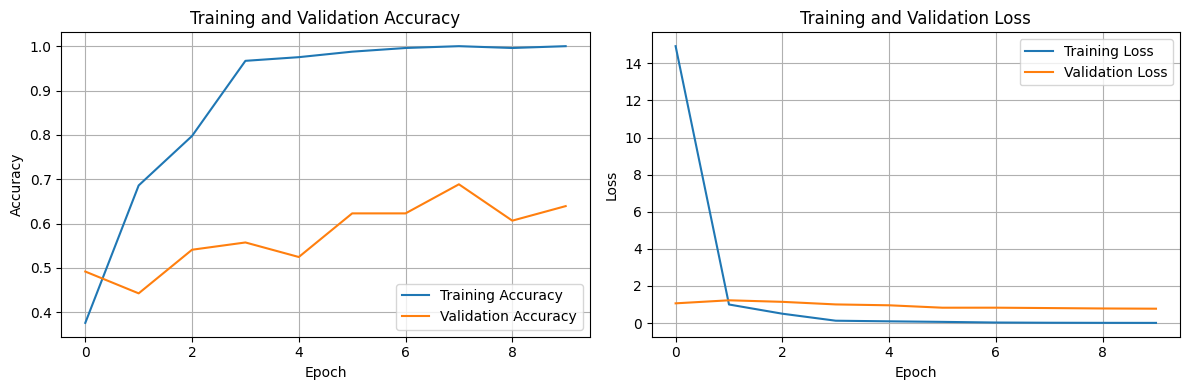

Training history visualized.


In [51]:
import matplotlib.pyplot as plt

# Get training and validation history from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Training history visualized.")

In [52]:
loss, accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")


10/10 - 1s - 99ms/step - accuracy: 0.4600 - loss: 1.2587
Test Loss: 1.2587
Test Accuracy: 0.4600


## 두번째 결과 0.46

## 훈련 이미지 해상도 변경 및 데이터 로드

### Subtask:
훈련 이미지(`x_train`, `y_train`)의 해상도를 128x128로 변경하고 다시 로드하여 정규화합니다.


In [58]:
import os

def resize_images(img_path):
	images=glob.glob(img_path + "/*.jpg")

	print(len(images), " images to be resized.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
	target_size=(128,128)
	for img in images:
		old_img=Image.open(img)
		new_img=old_img.resize(target_size,Image.LANCZOS)
		new_img.save(img, "JPEG")

	print(len(images), " images resized.")

# Define base_dir, assuming it's meant to be the parent directory for rock_paper_scissors
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
os.makedirs(base_dir, exist_ok=True)

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서
image_dir_path = os.path.join(base_dir, "scissor") # Corrected path to the extracted directory
resize_images(image_dir_path)

print("가위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
가위 이미지 resize 완료!


In [59]:
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
image_dir_path = os.path.join(base_dir, "rock") # Corrected path to the extracted directory

resize_images(image_dir_path)

print("바위 이미지 resize 완료!")

101  images to be resized.
101  images resized.
바위 이미지 resize 완료!


In [60]:
base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors"
image_dir_path = os.path.join(base_dir, "paper") # Corrected path to the extracted directory

resize_images(image_dir_path)

print("보 이미지 resize 완료!")

101  images to be resized.
101  images resized.
보 이미지 resize 완료!


In [61]:
import numpy as np

def load_data(img_path, number_of_data=303):  # 가위바위보 이미지 개수 총합에 주의하세요.
    # 가위 : 0, 바위 : 1, 보 : 2
    img_size=128 # Changed img_size to 128
    color=3
    #이미지 데이터와 라벨(가위 : 0, 바위 : 1, 보 : 2) 데이터를 담을 행렬(matrix) 영역을 생성합니다.
    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("학습데이터(x_train)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

base_dir = os.getenv("HOME") + "/aiffel/rock_paper_scissors" # Define base_dir
image_dir_path = base_dir # Use base_dir for loading data
(x_train, y_train)=load_data(image_dir_path, number_of_data=303)   # Updated number_of_data to match actual images (101*3)
x_train_norm = x_train/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_train shape: {}".format(x_train.shape))
print("y_train shape: {}".format(y_train.shape))

학습데이터(x_train)의 이미지 개수는 303 입니다.
x_train shape: (303, 128, 128, 3)
y_train shape: (303,)


## ImageDataGenerator 재설정

### Subtask:
변경될 이미지 해상도(128x128)에 맞춰 `ImageDataGenerator`를 재설정하고, `train_datagen`과 `val_datagen`을 다시 생성합니다.


In [62]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# 2. x_train_norm과 y_train 데이터를 훈련 세트와 검증 세트로 다시 분할합니다.
x_train_split, x_val_split, y_train_split, y_val_split = train_test_split(x_train_norm, y_train, test_size=0.2, random_state=42)

print("Data split into training and validation sets.")
print(f"x_train_split shape: {x_train_split.shape}")
print(f"y_train_split shape: {y_train_split.shape}")
print(f"x_val_split shape: {x_val_split.shape}")
print(f"y_val_split shape: {y_val_split.shape}")

# 3. 훈련 데이터 증강을 위한 ImageDataGenerator 인스턴스(train_datagen)를 생성합니다.
train_datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    fill_mode='nearest'
)

# 4. 검증 데이터 증강을 위한 ImageDataGenerator 인스턴스(val_datagen)를 생성합니다.
val_datagen = ImageDataGenerator()

# 5. train_datagen과 val_datagen 인스턴스에 flow() 메서드를 사용하여 훈련 및 검증 데이터를 연결합니다.
train_generator = train_datagen.flow(x_train_split, y_train_split, batch_size=32)
val_generator = val_datagen.flow(x_val_split, y_val_split, batch_size=32)

print("ImageDataGenerator for training and validation created and data generators flow initialized.")

Data split into training and validation sets.
x_train_split shape: (242, 128, 128, 3)
y_train_split shape: (242,)
x_val_split shape: (61, 128, 128, 3)
y_val_split shape: (61,)
ImageDataGenerator for training and validation created and data generators flow initialized.


## 모델 구조 재정의 및 컴파일

### Subtask:
모델의 `input_shape`을 (128,128,3)으로 변경하고, Conv2D 레이어의 필터 수를 32 -> 64 -> 128로 늘리며, `Flatten` 레이어를 `GlobalAveragePooling2D`로 교체합니다. `Dropout` 비율은 0.5로 설정하고, `BatchNormalization`은 기존과 같이 유지한 후 모델을 다시 컴파일합니다.


In [65]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.Input(shape=(128,128,3)), # Recommended way to specify input shape in Sequential models
    keras.layers.Conv2D(64, (3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.Conv2D(128, (3,3)),
    keras.layers.BatchNormalization(),
    keras.layers.Activation('relu'),
    keras.layers.MaxPooling2D((2,2)),

    keras.layers.GlobalAveragePooling2D(), # Replaced Flatten with GlobalAveragePooling2D
    keras.layers.Dropout(0.5), # Changed Dropout rate to 0.5

    keras.layers.Dense(128, activation='relu'), # Increased units
    keras.layers.Dense(3, activation='softmax')
])

model.summary()

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
print("Model redefined and recompiled with updated architecture and parameters.")

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_20 (Conv2D)              │ (None, 126, 126, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 126, 126, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 126, 126, 64)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_20 (MaxPooling2D) │ (None, 63, 63, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_21 (Conv2D)              │ (None, 61, 61, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_11          │ (None, 61, 61, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_11 (Activation)      │ (None, 61, 61, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_21 (MaxPooling2D) │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_2      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_7 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_20 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_21 (Dense)                │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,315 (364.51 KB)

 Trainable params: 92,931 (363.01 KB)

 Non-trainable params: 384 (1.50 KB)

Model redefined and recompiled with updated architecture and parameters.


## 데이터 증강을 적용하여 모델 학습

### Subtask:
새롭게 정의된 모델을 컴파일하고, ImageDataGenerator를 통해 증강된 훈련 데이터(train_datagen)와 검증 데이터(val_datagen)를 사용하여 모델을 다시 학습시킵니다. 학습 이력은 history 객체에 저장합니다.


In [66]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

print("Model trained with data augmentation and validation data.")

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 26s 3s/step - accuracy: 0.4093 - loss: 1.1236 - val_accuracy: 0.3115 - val_loss: 1.0989
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.3931 - loss: 1.1029 - val_accuracy: 0.3279 - val_loss: 1.1019
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 31s 4s/step - accuracy: 0.4440 - loss: 1.0108 - val_accuracy: 0.3115 - val_loss: 1.1008
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.4315 - loss: 1.0267 - val_accuracy: 0.3115 - val_loss: 1.1020
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5508 - loss: 0.9460 - val_accuracy: 0.3115 - val_loss: 1.1068
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 22s 3s/step - accuracy: 0.5399 - loss: 0.9397 - val_accuracy: 0.3115 - val_loss: 1.1117
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.6572 - loss: 0.8736 - val_accuracy: 0.3115 - val_loss: 1.1354
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 23s 3s/step - accuracy: 0.5598 - loss: 0.8574 - val_accuracy: 0.3115 - val_loss: 1.1398
Epoch 9/

## 학습 결과 시각화

### Subtask:
재학습된 모델의 훈련 및 검증 정확도와 손실 변화를 `matplotlib`을 이용해 그래프로 시각화하여 데이터 증강 적용 후의 학습 경향을 분석합니다.


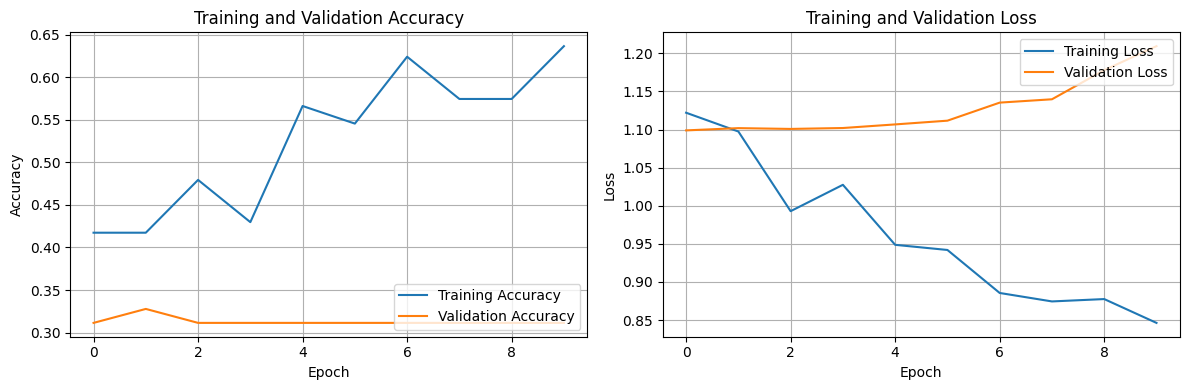

Training history with data augmentation visualized.


In [68]:
import matplotlib.pyplot as plt

# Get training and validation history from the history object
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1) # 1 row, 2 columns, first plot
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)

plt.subplot(1, 2, 2) # 1 row, 2 columns, second plot
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)

plt.tight_layout()
plt.show()

print("Training history with data augmentation visualized.")

## 학습 결과 시각화

### Subtask:
재학습된 모델의 훈련 및 검증 정확도와 손실 변화를 `matplotlib`을 이용해 그래프로 시각화하여 데이터 증강 적용 후의 학습 경향을 분석합니다.


## 학습 결과 시각화 분석

### Task:
시각화된 그래프를 통해 재학습된 모델의 훈련 및 검증 정확도와 손실 변화를 분석합니다. 이 단계는 데이터 증강 적용 후 모델의 학습 경향을 파악하고 오버피팅 여부를 확인하는 데 중요합니다.

#### Instructions
1.  **훈련 정확도(Training Accuracy)와 검증 정확도(Validation Accuracy) 그래프를 살펴봅니다.** 두 값의 차이가 크다면 과적합(Overfitting)이 발생하고 있을 가능성이 있습니다.
2.  **훈련 손실(Training Loss)과 검증 손실(Validation Loss) 그래프를 살펴봅니다.** 훈련 손실은 감소하는데 검증 손실은 증가하거나 크게 변동한다면, 모델이 훈련 데이터에 과적합되고 있음을 의미할 수 있습니다.
3.  **이전 모델의 학습 결과와 비교하여 데이터 증강 및 모델 구조 개선이 학습 경향에 어떤 영향을 미쳤는지 분석합니다.** 특히, 검증 세트의 정확도와 손실이 개선되었는지, 아니면 여전히 과적합 문제가 심화되었는지 확인합니다.
4.  **이러한 시각화 결과를 바탕으로 현재 모델의 성능과 추가적인 개선 방향에 대한 결론을 도출합니다.**

In [69]:
import zipfile
import os

# 2. 새로운 테스트 이미지를 저장할 디렉토리 경로를 '/root/aiffel/rock_paper_scissors_test_new_2'로 설정하고 test_dir_new_2 변수에 할당합니다.
test_dir_new_2 = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new_2"

# 3. os.makedirs() 함수를 사용하여 test_dir_new_2 디렉토리를 생성합니다.
os.makedirs(test_dir_new_2, exist_ok=True)
print(f"Created new directory for test images: {test_dir_new_2}")

# 4. scissor2.zip, rock2.zip, paper2.zip 각 파일의 경로를 변수에 할당합니다.
zip_files = {
    'scissor2.zip': './scissor2.zip',
    'rock2.zip': './rock2.zip',
    'paper2.zip': './paper2.zip'
}

# 5. 각 zip 파일에 대해 zipfile.ZipFile()을 사용하여 파일을 읽기 모드로 열고, extractall() 메서드를 사용하여 test_dir_new_2 경로에 압축 해제합니다.
for zip_name, zip_path in zip_files.items():
    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(test_dir_new_2)
        print(f"{zip_name} 파일 압축 해제 완료!")
    else:
        print(f"Warning: {zip_name} not found at {zip_path}")

Created new directory for test images: /root/aiffel/rock_paper_scissors_test_new_2
scissor2.zip 파일 압축 해제 완료!
rock2.zip 파일 압축 해제 완료!
paper2.zip 파일 압축 해제 완료!


## 새로운 테스트 이미지 리사이징

### Subtask:
새롭게 압축 해제된 테스트 데이터셋(`scissor2`, `rock2`, `paper2`)에 포함된 이미지들을 모델의 입력 크기(128x128)에 맞춰 리사이징합니다.


In [70]:
import glob
from PIL import Image
import os

def resize_images_test(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(f"{len(images)} images to be resized in {img_path}.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
    target_size = (128, 128)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.LANCZOS)
        new_img.save(img, "JPEG")

    print(f"{len(images)} images resized in {img_path}.")

test_dir_new_2 = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new_2"

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_scissor_test_2 = os.path.join(test_dir_new_2, "scissor")
resize_images_test(image_dir_path_scissor_test_2)
print("새 테스트 가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_rock_test_2 = os.path.join(test_dir_new_2, "rock")
resize_images_test(image_dir_path_rock_test_2)
print("새 테스트 바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_paper_test_2 = os.path.join(test_dir_new_2, "paper")
resize_images_test(image_dir_path_paper_test_2)
print("새 테스트 보 이미지 resize 완료!")

0 images to be resized in /root/aiffel/rock_paper_scissors_test_new_2/scissor.
0 images resized in /root/aiffel/rock_paper_scissors_test_new_2/scissor.
새 테스트 가위 이미지 resize 완료!
0 images to be resized in /root/aiffel/rock_paper_scissors_test_new_2/rock.
0 images resized in /root/aiffel/rock_paper_scissors_test_new_2/rock.
새 테스트 바위 이미지 resize 완료!
0 images to be resized in /root/aiffel/rock_paper_scissors_test_new_2/paper.
0 images resized in /root/aiffel/rock_paper_scissors_test_new_2/paper.
새 테스트 보 이미지 resize 완료!


In [71]:
import os

test_dir_new_2 = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new_2"

print(f"Contents of {test_dir_new_2}:")
for root, dirs, files in os.walk(test_dir_new_2):
    level = root.replace(test_dir_new_2, '').count(os.sep)
    indent = ' ' * 4 * (level)
    print(f'{indent}{os.path.basename(root)}/')
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f'{subindent}{f}')

Contents of /root/aiffel/rock_paper_scissors_test_new_2:
rock_paper_scissors_test_new_2/
    37.jpg
    23.jpg
    104.jpg
    90.jpg
    50.jpg
    30.jpg
    72.jpg
    106.jpg
    54.jpg
    51.jpg
    49.jpg
    107.jpg
    52.jpg
    67.jpg
    105.jpg
    44.jpg
    68.jpg
    42.jpg
    82.jpg
    26.jpg
    10.jpg
    60.jpg
    94.jpg
    32.jpg
    13.jpg
    102.jpg
    71.jpg
    55.jpg
    3.jpg
    58.jpg
    1.jpg
    59.jpg
    75.jpg
    69.jpg
    43.jpg
    16.jpg
    85.jpg
    65.jpg
    9.jpg
    31.jpg
    22.jpg
    84.jpg
    63.jpg
    70.jpg
    6.jpg
    34.jpg
    91.jpg
    97.jpg
    40.jpg
    12.jpg
    73.jpg
    8.jpg
    41.jpg
    57.jpg
    15.jpg
    77.jpg
    21.jpg
    14.jpg
    5.jpg
    96.jpg
    53.jpg
    56.jpg
    81.jpg
    108.jpg
    7.jpg
    80.jpg
    11.jpg
    35.jpg
    17.jpg
    61.jpg
    38.jpg
    87.jpg
    74.jpg
    19.jpg
    86.jpg
    103.jpg
    0.jpg
    27.jpg
    64.jpg
    18.jpg
    25.jpg
    98.jpg
    45.jpg

In [72]:
import zipfile
import os
import shutil

test_dir_new_2 = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new_2"

# 1. Clean up the existing directory if it contains mixed files
if os.path.exists(test_dir_new_2):
    shutil.rmtree(test_dir_new_2)
    print(f"Removed existing directory: {test_dir_new_2}")

# 2. Recreate the base directory
os.makedirs(test_dir_new_2, exist_ok=True)
print(f"Created new directory for test images: {test_dir_new_2}")

# 3. Define zip files and their target subdirectories
zip_info = {
    './scissor2.zip': 'scissor',
    './rock2.zip': 'rock',
    './paper2.zip': 'paper'
}

# 4. Extract each zip file into its corresponding subdirectory
for zip_path, sub_dir_name in zip_info.items():
    target_dir = os.path.join(test_dir_new_2, sub_dir_name)
    os.makedirs(target_dir, exist_ok=True)

    if os.path.exists(zip_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(target_dir)
        print(f"'{os.path.basename(zip_path)}' extracted to '{target_dir}'")
    else:
        print(f"Warning: {os.path.basename(zip_path)} not found at {zip_path}")

print("All zip files re-extracted into their respective subdirectories!")

Removed existing directory: /root/aiffel/rock_paper_scissors_test_new_2
Created new directory for test images: /root/aiffel/rock_paper_scissors_test_new_2
'scissor2.zip' extracted to '/root/aiffel/rock_paper_scissors_test_new_2/scissor'
'rock2.zip' extracted to '/root/aiffel/rock_paper_scissors_test_new_2/rock'
'paper2.zip' extracted to '/root/aiffel/rock_paper_scissors_test_new_2/paper'
All zip files re-extracted into their respective subdirectories!


In [73]:
import glob
from PIL import Image
import os

def resize_images_test(img_path):
    images = glob.glob(img_path + "/*.jpg")

    print(f"{len(images)} images to be resized in {img_path}.")

    # 파일마다 모두 128x128 사이즈로 바꾸어 저장합니다.
    target_size = (128, 128)
    for img in images:
        old_img = Image.open(img)
        new_img = old_img.resize(target_size, Image.LANCZOS)
        new_img.save(img, "JPEG")

    print(f"{len(images)} images resized in {img_path}.")

test_dir_new_2 = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new_2"

# 가위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_scissor_test_2 = os.path.join(test_dir_new_2, "scissor")
resize_images_test(image_dir_path_scissor_test_2)
print("새 테스트 가위 이미지 resize 완료!")

# 바위 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_rock_test_2 = os.path.join(test_dir_new_2, "rock")
resize_images_test(image_dir_path_rock_test_2)
print("새 테스트 바위 이미지 resize 완료!")

# 보 이미지가 저장된 디렉토리 아래의 모든 jpg 파일을 읽어들여서 리사이징합니다.
image_dir_path_paper_test_2 = os.path.join(test_dir_new_2, "paper")
resize_images_test(image_dir_path_paper_test_2)
print("새 테스트 보 이미지 resize 완료!")

110 images to be resized in /root/aiffel/rock_paper_scissors_test_new_2/scissor.
110 images resized in /root/aiffel/rock_paper_scissors_test_new_2/scissor.
새 테스트 가위 이미지 resize 완료!
110 images to be resized in /root/aiffel/rock_paper_scissors_test_new_2/rock.
110 images resized in /root/aiffel/rock_paper_scissors_test_new_2/rock.
새 테스트 바위 이미지 resize 완료!
110 images to be resized in /root/aiffel/rock_paper_scissors_test_new_2/paper.
110 images resized in /root/aiffel/rock_paper_scissors_test_new_2/paper.
새 테스트 보 이미지 resize 완료!


In [74]:
import numpy as np

def load_data_test(img_path, number_of_data=330):  # Total number of test images (110*3)
    img_size=128 # Changed img_size to 128
    color=3

    imgs=np.zeros(number_of_data*img_size*img_size*color,dtype=np.int32).reshape(number_of_data,img_size,img_size,color)
    labels=np.zeros(number_of_data,dtype=np.int32)

    idx=0
    for file in glob.iglob(img_path+'/scissor/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=0   # 가위 : 0
        idx=idx+1

    for file in glob.iglob(img_path+'/rock/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=1   # 바위 : 1
        idx=idx+1

    for file in glob.iglob(img_path+'/paper/*.jpg'):
        img = np.array(Image.open(file),dtype=np.int32)
        imgs[idx,:,:,:]=img    # 데이터 영역에 이미지 행렬을 복사
        labels[idx]=2   # 보 : 2
        idx=idx+1

    print("테스트데이터(x_test)의 이미지 개수는", idx,"입니다.")
    return imgs, labels

test_dir_new_2 = os.getenv("HOME") + "/aiffel/rock_paper_scissors_test_new_2" # Define test_dir_new_2
image_dir_path_test = test_dir_new_2 # Use test_dir_new_2 for loading data
(x_test, y_test)=load_data_test(image_dir_path_test, number_of_data=330)   # Updated number_of_data to match actual images (110*3)
x_test_norm = x_test/255.0   # 입력은 0~1 사이의 값으로 정규화

print("x_test shape: {}".format(x_test.shape))
print("y_test shape: {}".format(y_test.shape))

테스트데이터(x_test)의 이미지 개수는 330 입니다.
x_test shape: (330, 128, 128, 3)
y_test shape: (330,)


In [75]:
loss, accuracy = model.evaluate(x_test_norm, y_test, verbose=2)

print(f"Test Loss: {loss:.4f}")
print(f"Test Accuracy: {accuracy:.4f}")

11/11 - 7s - 647ms/step - accuracy: 0.3333 - loss: 1.2607
Test Loss: 1.2607
Test Accuracy: 0.3333
